In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Dataset Preprocessing

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [4]:
train_path = "data//train//"
validation_path = "data//validation//"
test_path = "data//test//"

In [5]:
batch_size = 32
image_shape=(200,200)

In [6]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 3000 images belonging to 5 classes.


In [7]:
validation_image_gen = image_gen.flow_from_directory(validation_path,
                                               target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 1000 images belonging to 5 classes.


In [8]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 1000 images belonging to 5 classes.


In [9]:
train_image_gen.class_indices

{'Aayush': 0, 'Kusham': 1, 'Riya': 2, 'Sahil': 3, 'Yuvraj': 4}

# Loading Model 

In [10]:
from tensorflow.keras.models import load_model
#model.save('Face Recognition 13.h5')
model=load_model('Face Recognition 13.h5')

In [11]:
df=test_image_gen.class_indices
df

{'Aayush': 0, 'Kusham': 1, 'Riya': 2, 'Sahil': 3, 'Yuvraj': 4}

In [12]:
keys=df.keys()
keys=list(keys)
keys=pd.DataFrame(keys)
keys.rename(columns={0:'Classes'})

,Classes
0,Aayush
1,Kusham
2,Riya
3,Sahil
4,Yuvraj


# Predictions

In [13]:
import matplotlib.pyplot as plt

Sahil


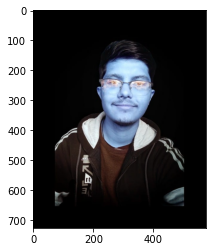

In [14]:
img = 'D:\\python\\Minor Project MTech\\data\\my pic.jpeg' 
# img='D:\\python\\Minor Project MTech\\data\\a1.jpeg'
# img='D:\\python\\Minor Project MTech\\data\\pic.jpeg'
#img='D:\\python\\Minor Project MTech\\data\\pic1.jpeg'
#img='D:\\python\\Minor Project MTech\\data\\pic.jpg'
img = cv2.imread(img)
plt.imshow(img)
cropped_face=img
harcascadePath = 'haarcascade_frontalface_default.xml'
face_classifier = cv2.CascadeClassifier(harcascadePath)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces = face_classifier.detectMultiScale(gray,1.3,5)
        
if faces is ():
    print("Not Found")
for (x,y,w,h) in faces:
    cropped_face = img[y:y+h,x:x+w]

# img = cv2.resize(img,(600,600))
# cv2.imshow("Input",img)
# key = cv2.waitKey(0)& 0xFF;
# if key == ord("q") or key == ord("Q") or key==13:
#         cv2.destroyAllWindows()

cropped_face = cv2.resize(cropped_face,(200,200))
cropped_face = cv2.cvtColor(cropped_face, cv2.COLOR_RGB2GRAY)
cropped_face =  np.expand_dims(cropped_face, axis=0)
cropped_face =  np.expand_dims(cropped_face, axis=-1)
#value = model.predict_classes(cropped_face)
value = np.argmax(model.predict(cropped_face),axis=1)

#cv2.imshow("Crop",cropped_face)
#cv2.waitKey(0);
Predicted_class = keys[0][int(value)]
print(Predicted_class)

# Video Prediction

In [15]:
import imutils
import time
from datetime import datetime,date

In [ ]:
vs = cv2.VideoCapture(0)
time.sleep(5.0)
harcascadePath = 'haarcascade_frontalface_default.xml'
face_classifier = cv2.CascadeClassifier(harcascadePath)
count=0
previous_detect=""
Face_recog=[]

while True:
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    today = date.today()
    today = today.strftime("%d %B, %Y")
    ret,frame = vs.read()
    frame = imutils.resize(frame, width=1200)
    cv2.rectangle(frame, (8,50), (150, 85), (0,0,0), -1)    
    cv2.rectangle(frame, (860,50), (1500, 90), (0,0,0), -1)
    cv2.putText(frame, str(current_time), (10,80), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 2)
    cv2.putText(frame, str(today), (860,80), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 2)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    for (x, y, w, h) in faces:
        cropped_face = frame[y:y+h,x:x+w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cropped_face = cv2.resize(cropped_face,(200,200))
        cropped_face = cv2.cvtColor(cropped_face, cv2.COLOR_RGB2GRAY)
        cropped_face =  np.expand_dims(cropped_face, axis=0)
        cropped_face =  np.expand_dims(cropped_face, axis=-1)
        
        #value = model.predict_classes(cropped_face)
        value = np.argmax(model.predict(cropped_face),axis=1)
        Predicted_class = keys[0][int(value)]
        
        cv2.rectangle(frame, (x-1, y+h+1), (x + w, y+h+40), (0, 255, 0), -1)
        cv2.putText(frame, Predicted_class, (x+10,y+h+30), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 2)
        
        if Predicted_class == previous_detect:
            count+=1
        else:
            count=0
            previous_detect = Predicted_class
            
        if count==20:
            if (Predicted_class not in Face_recog):
                print(Predicted_class,"@",current_time,"@",today)
                Face_recog.append(Predicted_class)
                
    cv2.imshow("Face Cam", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q") or key == ord("Q") or key==13:
        break
vs.release()
cv2.destroyAllWindows()

# Attendance

In [ ]:
Attendance_df = pd.read_csv("D:\\python\\Minor Project MTech\\Attendance\\Attendance.csv")
today = date.today()
today = today.strftime("%d-%b-%y")
present=[]
i=0
for name in Attendance_df['Name']:
    if name in Face_recog:
        present.append(1)
    else :
        present.append(0)
if today not in Attendance_df.columns:
    today = date.today()
    today = today.strftime("%d-%b-%Y")
    df=pd.DataFrame({today : present})
    result = pd.concat([Attendance_df.iloc[:,:-2],df,Attendance_df.iloc[:,-2:]], axis=1, join='inner')
    result['Total Attendance'] = result.iloc[:,3:-2].sum(axis=1)
    result['Attendance Percentage'] = round(result['Total Attendance']/(len(result.columns)-5)*100,2)
    result.to_csv ('D:\\python\\Minor Project MTech\\Attendance\\Attendance.csv', index = False, header=True)
    display(result)
else:
    for n in present:
        if(n==1):
            Attendance_df[today][i]=1
        i+=1
    Attendance_df['Total Attendance'] = Attendance_df.iloc[:,3:-2].sum(axis=1)
    Attendance_df['Attendance Percentage'] = round(Attendance_df['Total Attendance']/(len(Attendance_df.columns)-5)*100,2)
    Attendance_df.to_csv ('D:\\python\\Minor Project MTech\\Attendance\\Attendance.csv', index = False, header=True)
    display(Attendance_df)

# Email Notifications

In [42]:
#imports required
import yagmail

### i) Sending CSV File

In [43]:
receiver = "kpssahiljasrotia@gmail.com"
body = "Please find the attanchment of attendance record upto "+today
filename = "D:\\python\\Minor Project MTech\\Attendance\\Attendance.csv"

yag = yagmail.SMTP("cocsahiljasrotia@gmail.com")
yag.send(
    to=receiver,
    subject="Class Attendance",
    contents=body, 
     attachments=filename  
)

print(f"Attendance CSV file forwarded to teacher")

Attendance CSV file forwarded to teacher


### ii) Sending Email Notifications to Absentees' Parents

In [44]:
i=0
for presence in Attendance_df[today]:
    if(presence==0):
        Name = Attendance_df['Name'][i]
        receiver = Attendance_df['Email'][i]
        Percentage = Attendance_df['Attendance Percentage'][i]
        body = f"Your ward {Name} was absent from today's lecture. \n\n {Name}'s current attendance is {Percentage}%. \n\n Please be concerned regarding your child's attendance as we will not be able to consider any excuse if he/she failed to maintain the minimum criteria."

        yag = yagmail.SMTP("cocsahiljasrotia@gmail.com")
        yag.send(
            to=receiver,
            subject=f"Attendance of {Name}",
            contents=body
        )
        
        print(f"Absence reported to {Name}'s Parents.")

    i+=1

Absence reported to Riya's Parents.
Absence reported to Yuvraj's Parents.


# Thankyou!!